## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

## LSTM Model

### i) Clean, No noise

In [2]:
periods = 100
points_per_period = 50
lag = 12
data = np.sin(np.linspace(0, 2*np.pi*periods, num=periods*points_per_period))

x, y = [], []
for i in range(lag, data.shape[0]-1):
  x.append(data[i-lag:i])
  y.append(data[i])

y = np.array(y)
x_lstm = np.expand_dims(x, axis=2)

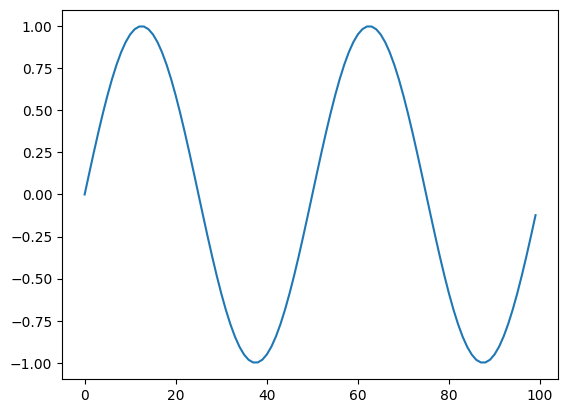

In [3]:
plt.plot(data[:100])

In [4]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((lag,1)),
    tf.keras.layers.LSTM(10, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='tanh')
])

lstm_model.compile(optimizer='adam', loss='mse')

Fit first 2400 samples

In [5]:
lstm_model.fit(x=x_lstm[:2400], 
               y=y[:2400], 
               batch_size=1, 
               epochs=1,
               shuffle=False)

2400/2400 [==============================] - 21s 4ms/step - loss: 0.0396


In [6]:
predictions = lstm_model(x_lstm[2400:2500])
print("Mean Squared Error:", mean_squared_error(y[2400:2500], predictions))

Mean Squared Error: 0.0020488415313718203


Fit the rest of the points

In [7]:
lstm_model.fit(x=x_lstm[2400:4900], 
               y=y[2400:4900], 
               batch_size=1, 
               epochs=1,
               shuffle=False)

2500/2500 [==============================] - 9s 4ms/step - loss: 0.0035


In [8]:
predictions = lstm_model(x_lstm[4900:5000])
print("Mean Squared Error:", mean_squared_error(y[4900:5000], predictions))

Mean Squared Error: 0.0072526405080660045


### ii) With noise

In [9]:
periods = 100
points_per_period = 50
lag = 12
data = np.sin(np.linspace(0, 2*np.pi*periods, num=periods*points_per_period))
noise = np.random.normal(0, 0.05, len(data))
data_noisy = data + noise
scaler = MinMaxScaler(feature_range=(-1,1))
data_noisy = scaler.fit_transform(np.reshape(data_noisy, (-1,1)))

x, y = [], []
for i in range(lag, data_noisy.shape[0]-1):
  x.append(data_noisy[i-lag:i])
  y.append(data_noisy[i])

y_noisy = np.array(y)
x_noisy = np.expand_dims(x, axis=2)

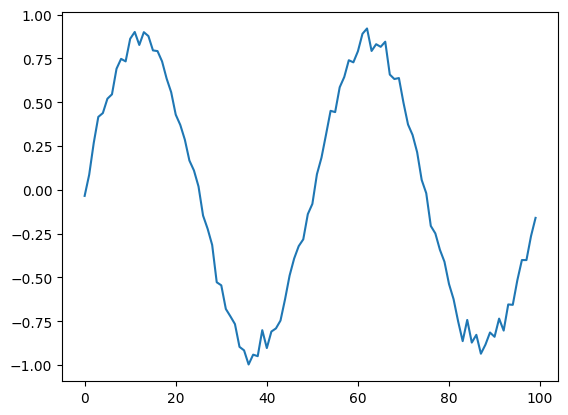

In [10]:
plt.plot(data_noisy[:100])

In [11]:
lstm_model_ii = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((lag,1)),
    tf.keras.layers.LSTM(10, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='tanh')
])

lstm_model_ii.compile(optimizer='adam', loss='mse')

Fit first 2400 samples

In [12]:
lstm_model_ii.fit(x=x_noisy[:2400], 
               y=y_noisy[:2400], 
               batch_size=1, 
               epochs=1,
               shuffle=False)

2400/2400 [==============================] - 11s 4ms/step - loss: 0.0362


In [13]:
predictions = lstm_model_ii(x_noisy[2400:2500])
print("Mean Squared Error:", mean_squared_error(y_noisy[2400:2500], predictions))

Mean Squared Error: 0.0050025137266327445


Fit the rest of the points

In [14]:
lstm_model_ii.fit(x=x_noisy[2400:4900], 
               y=y_noisy[2400:4900], 
               batch_size=1, 
               epochs=1,
               shuffle=False)

2500/2500 [==============================] - 9s 3ms/step - loss: 0.0047


In [15]:
predictions = lstm_model_ii(x_noisy[4900:5000])
print("Mean Squared Error:", mean_squared_error(y_noisy[4900:5000], predictions))

Mean Squared Error: 0.004543689647520527


## Focused time-lagged feedforward network

#### i) No Noise

#### ii) With Noise

In [16]:
model_ii = tf.keras.models.Sequential([
    tf.keras.layers.Dense(lag, activation='relu', input_dim=x_lstm.shape[1]),
    tf.keras.layers.Dense(1),
])
model_ii.compile(optimizer='adam', loss='mse')

Fit first 2400 samples

In [17]:
model_ii.fit(x=x_noisy[:2400], 
               y=y_noisy[:2400], 
               batch_size=1, 
               epochs=1,
               shuffle=False)

ValueError: ignored

In [ ]:
predictions = model_ii(x_noisy[2400:2500])
print("Mean Squared Error:", mean_squared_error(y_noisy[2400:2500], predictions))

Fit the rest of the points

In [ ]:
model_ii.fit(x=x_noisy[2400:4900], 
               y=y_noisy[2400:4900], 
               batch_size=1, 
               epochs=1,
               shuffle=False)

In [ ]:
predictions = model_ii(x_noisy[4900:5000])
print("Mean Squared Error:", mean_squared_error(y_noisy[4900:5000], predictions))

## Problem 2

In [18]:
def autoregression_model(serie):
  t = len(serie)
  return 0.6*serie[t-1] - 0.54*serie[t-2] - 0.44*serie[t-3] + np.random.normal(0, 0.01)

In [19]:
periods = 100
points_per_period = 50
lag = 12
data = [5,6,3]
for x in range(5000-3):
  data.append(autoregression_model(data))

scaler = MinMaxScaler(feature_range=(-1,1))
data = scaler.fit_transform(np.reshape(data, (-1,1)))

x, y = [], []
for i in range(lag, len(data)-1):
  x.append(data[i-lag:i])
  y.append(data[i])

y_auto = np.array(y)
x_auto = np.expand_dims(x, axis=2)

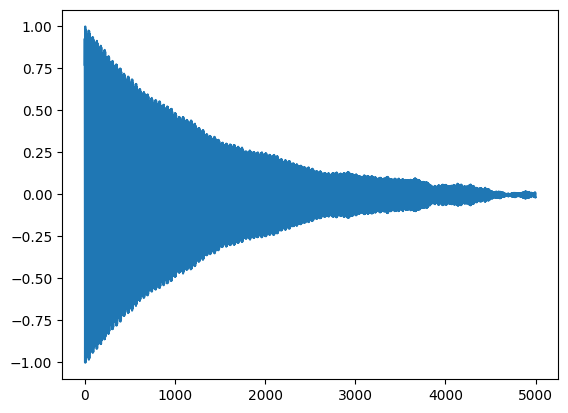

In [20]:
plt.plot(data)

### LSTM Model

In [21]:
lstm_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((lag,1)),
    tf.keras.layers.LSTM(10, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='tanh')
])

lstm_model_2.compile(optimizer='adam', loss='mse')

Fit first 2400 samples

In [22]:
lstm_model_2.fit(x=x_auto[:2400], 
               y=y_auto[:2400], 
               batch_size=1, 
               epochs=50,
               shuffle=False)

Epoch 1/50
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0548
Epoch 2/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0016
Epoch 3/50
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0012
Epoch 4/50
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0010
Epoch 5/50
2400/2400 [==============================] - 9s 4ms/step - loss: 8.6752e-04
Epoch 6/50
2400/2400 [==============================] - 8s 4ms/step - loss: 7.2928e-04
Epoch 7/50
2400/2400 [==============================] - 8s 4ms/step - loss: 6.1870e-04
Epoch 8/50
2400/2400 [==============================] - 9s 4ms/step - loss: 5.4340e-04
Epoch 9/50
2400/2400 [==============================] - 9s 4ms/step - loss: 4.9838e-04
Epoch 10/50
2400/2400 [==============================] - 8s 3ms/step - loss: 4.7577e-04
Epoch 11/50
2400/2400 [==============================] - 9s 4ms/step - loss: 4.6424e-04
Epoch 12/50
2400/2400 [==============================] -

In [23]:
predictions = lstm_model_2(x_auto[2400:2500])
print("Mean Squared Error:", mean_squared_error(y_auto[2400:2500], predictions))

Mean Squared Error: 3.984040853998881e-06


Fit the rest of the points

In [24]:
lstm_model_2.fit(x=x_auto[2400:4900], 
               y=y_auto[2400:4900], 
               batch_size=1, 
               epochs=50,
               shuffle=False)

Epoch 1/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.1801e-05
Epoch 2/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.2276e-05
Epoch 3/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.1531e-05
Epoch 4/50
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0415e-05
Epoch 5/50
2500/2500 [==============================] - 9s 4ms/step - loss: 9.4964e-06
Epoch 6/50
2500/2500 [==============================] - 9s 4ms/step - loss: 8.8003e-06
Epoch 7/50
2500/2500 [==============================] - 8s 3ms/step - loss: 8.2629e-06
Epoch 8/50
2500/2500 [==============================] - 9s 4ms/step - loss: 7.8343e-06
Epoch 9/50
2500/2500 [==============================] - 9s 4ms/step - loss: 7.4807e-06
Epoch 10/50
2500/2500 [==============================] - 9s 4ms/step - loss: 7.1788e-06
Epoch 11/50
2500/2500 [==============================] - 8s 3ms/step - loss: 6.9167e-06
Epoch 12/50
2500/2500 [==================

In [25]:
predictions = lstm_model_ii(x_noisy[4900:5000])
print("Mean Squared Error:", mean_squared_error(y_noisy[4900:5000], predictions))

Mean Squared Error: 0.004543689647520527


### Focused time-lagged feedforward network

In [26]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(lag, activation='relu', input_dim=x_lstm.shape[1]),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss="mean_squared_error", optimizer='adam')

Fit first 2400 samples

In [27]:
model_2.fit(x=x_auto[:2400], 
               y=y_auto[:2400], 
               batch_size=1, 
               epochs=50,
               shuffle=False)

Epoch 1/50


ValueError: ignored

In [ ]:
predictions = model_2(x_auto[2400:2500])
print("Mean Squared Error:", mean_squared_error(y_auto[2400:2500], predictions))

Fit the rest of the points

In [ ]:
model_2.fit(x=x_auto[2400:4900], 
               y=y_auto[2400:4900], 
               batch_size=1, 
               epochs=50,
               shuffle=False)

In [ ]:
predictions = model_2(x_auto[4900:5000])
print("Mean Squared Error:", mean_squared_error(y_auto[4900:5000], predictions))